In [153]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [155]:
data = {
    'weight': [0.2,0.22,0.23,0.256,0.3,0.33,0.37,0.4,0.44,0.46],
    'obesity': [0,0,0,0,1,1,0,1,1,1]
}
df = pd.DataFrame(data)

In [156]:
df

,weight,obesity
0,0.200,0
1,0.220,0
2,0.230,0
3,0.256,0
4,0.300,1
5,0.330,1
6,0.370,0
7,0.400,1
8,0.440,1
9,0.460,1


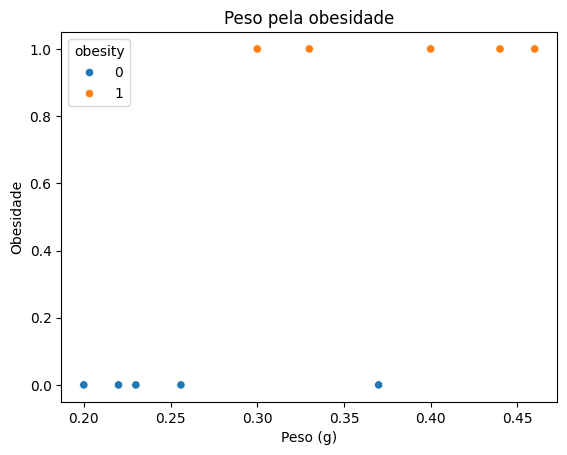

In [157]:
sns.scatterplot(x='weight', y='obesity', data=df,hue='obesity')
plt.title('Peso pela obesidade')
plt.xlabel('Peso (g)')
plt.ylabel('Obesidade')
plt.show()

In [162]:
df['const'] = 1
X = df[['weight','const']]
y = df['obesity']
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.366204
         Iterations 7


In [165]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                obesity   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.4717
Time:                        14:58:11   Log-Likelihood:                -3.6620
converged:                       True   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                   0.01055
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weight        26.1513     14.769      1.771      0.077      -2.795      55.097
const         -8.2816      4.713     -1.757      0.079     -17.520       0.957
==============================================================================
"""

In [177]:
model.predict([0.380,1])

array([0.83968348])

### Variaveis discretas

In [200]:
data = {
    'gene':[1,1,0,0,0,0,1,1,1,0],
    'obesity':[1,1,0,0,1,0,0,1,1,1],
}
df = pd.DataFrame(data)

In [201]:
df1

,gene,obesity
0,1,1
1,1,1
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,1
8,1,1
9,0,1


In [202]:
df['const'] = 1
X = df[['gene','const']]
y = df['obesity']
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.586707
         Iterations 5


In [203]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                obesity   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1282
Time:                        16:27:26   Log-Likelihood:                -5.8671
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                    0.1889
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gene           1.7918      1.443      1.241      0.214      -1.037       4.621
const         -0.4055      0.913     -0.444      0.657      -2.195       1.384
==============================================================================
"""

In [210]:
print(f'A chance de um rato do gene 1 se obeso é de :{model.predict([1,1])}')
print(f'A chance de um rato do gene 0 se obeso é de :{model.predict([0,1])}')

A chance de um rato do gene 1 se obeso é de :[0.8]
A chance de um rato do gene 0 se obeso é de :[0.4]
